# Part 1: data preparation

In [1]:
import os
import json

# open folder, loop through files, check if file in training set
with open("/scratch/lt2326-h21/a1/info.json", "r") as json_file:
    meta = json.load(json_file)
    train_file_names = [obj['file_name'] for obj in meta['train']]
    files_to_keep = [img_path for img_path in os.listdir("/scratch/lt2326-h21/a1/images") if img_path in train_file_names]

In [3]:
len(files_to_keep)

845

In [2]:
# split into training, validation, and test datasets
from sklearn.model_selection import train_test_split
training_data, temp_data = train_test_split(files_to_keep, test_size=0.3)
validation_data = temp_data[:len(temp_data)//2]
testing_data = temp_data[len(temp_data)//2:]

In [96]:
# find the corresponding bounding box information for each image
def get_bounding_boxes(files_list):
    with open("/scratch/lt2326-h21/a1/train.jsonl", "r") as jsonl_file:
        result = {}
        for line in jsonl_file:
            line_as_dict = json.loads(line)
            if line_as_dict['file_name'] in files_list:
                for sentence in line_as_dict['annotations']:
                    for instance in sentence:
                        if instance['is_chinese']:
                            if line_as_dict['file_name'] not in result:
                                result[line_as_dict['file_name']] = []
                            result[line_as_dict['file_name']].append(instance['polygon'])
        return result
                            
training_dict = get_bounding_boxes(training_data)
validation_dict = get_bounding_boxes(validation_data)
testing_dict = get_bounding_boxes(testing_data)

In [4]:
training_bb.keys()

dict_keys(['0000172.jpg', '0000174.jpg', '0000176.jpg', '0000181.jpg', '0000187.jpg', '0000188.jpg', '0000189.jpg', '0000197.jpg', '0000202.jpg', '0000208.jpg', '0000211.jpg', '0000221.jpg', '0000223.jpg', '0000225.jpg', '0000230.jpg', '0000233.jpg', '0000234.jpg', '0000392.jpg', '0000395.jpg', '0000397.jpg', '0000400.jpg', '0000401.jpg', '0000406.jpg', '0000419.jpg', '0000431.jpg', '0000440.jpg', '0000444.jpg', '0000445.jpg', '0000447.jpg', '0000448.jpg', '0000450.jpg', '0000452.jpg', '0000453.jpg', '0000454.jpg', '0000464.jpg', '0000465.jpg', '0000472.jpg', '0000481.jpg', '0000482.jpg', '0000483.jpg', '0000558.jpg', '0000559.jpg', '0000564.jpg', '0000567.jpg', '0000573.jpg', '0000574.jpg', '0000577.jpg', '0000579.jpg', '0000587.jpg', '0000588.jpg', '0000601.jpg', '0000602.jpg', '0000604.jpg', '0000605.jpg', '0000607.jpg', '0000610.jpg', '0000612.jpg', '0000614.jpg', '0000617.jpg', '0000619.jpg', '0000620.jpg', '0000636.jpg', '0000638.jpg', '0000639.jpg', '0000640.jpg', '0000641.jpg',

In [4]:
#for key in training_bb.keys():
# convert to numpy array
#img_array = mpimg.imread('/scratch/lt2326-h21/a1/images/' + "0000174.jpg")
#img_poly = img_array.copy()
#points = np.array( [training_bb["0000174.jpg"][0]], dtype=np.int32 )
#cv2.polylines(img_poly, points, True, (255,255,255), 1)

#plt.imshow(img_poly)

#img_array = mpimg.imread('/scratch/lt2326-h21/a1/images/' + "0000174.jpg")
#img_array = img_array.reshape(12582912//2, 2)
    
#plt.imshow(img_array)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.path as mppath
from PIL import Image
import cv2
import numpy as np

grid = np.array([[[a,b] for b in list(range(2048))] for a in list(range(2048))])
grid = grid.reshape(2048*2048, 2)

In [129]:
# training data is tuple (img, pixel_labels)
# where img is of shape (2048, 2048, 3) (3 is rgb values of the pixel)
# pixel_labels is of shape (4194304,)
# meaning each pixel in img should have a label 1 or 0, corresponding if that pixel is inside the polygon

def get_pixel_labels(data_dict):
    data_list = []
    for key in list(data_dict.keys()):
        print(key , end='\r')

        # convert to numpy array
        img_array = mpimg.imread('/scratch/lt2326-h21/a1/images/' + key)

        # if pixel is inside polygon, give it label true
        # if not, give label false
        final_labels = []
        for polygon in data_dict[key]:
            path = mppath.Path(np.array(polygon))
            pixel_labels = np.asarray(path.contains_points(grid), int)
            if len(final_labels) < 1:
                final_labels = pixel_labels
            else:
                final_labels = np.maximum(final_labels, pixel_labels) # replace old zeros with ones

        data_list.append((img_array, pixel_labels))
    return data_list

train_data_list = get_pixel_labels(training_dict)
len(train_data_list)

In [104]:
# save training data to file to make life easier       
a_file = open("training_data.npy", "w+")
np.save("training_data.npy", np.asarray(train_data_list))
a_file.close()

In [ ]:
# load training data from file
with open('training_data.npy', 'rb') as f:
    train_data_list = np.load(f)

In [27]:
import numpy
data_list[0]
A = [0, 1, 0]
B = [1, 1, 0]
A = np.maximum(B, A)
A
unique, counts = numpy.unique(data_list[1][1], return_counts=True)
dict(zip(unique, counts))

{0: 4194045, 1: 259}

In [7]:
%matplotlib inline

In [33]:
testimg = Image.open("{}/{}".format("/scratch/lt2326-h21/a1/images", "0000174.jpg")).resize((100,100))

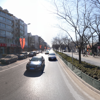

In [34]:
testimg

[[[223 242 255]
  [223 242 255]
  [223 242 255]
  ...
  [188 218 252]
  [187 218 249]
  [187 218 249]]

 [[223 242 255]
  [223 242 255]
  [223 242 255]
  ...
  [188 218 254]
  [187 217 251]
  [187 217 251]]

 [[223 242 255]
  [222 241 255]
  [222 241 255]
  ...
  [188 218 255]
  [188 218 254]
  [187 217 253]]

 ...

 [[111 102 103]
  [113 104 105]
  [113 104 105]
  ...
  [192 175 165]
  [190 173 163]
  [188 171 161]]

 [[115 106 107]
  [116 107 108]
  [115 106 107]
  ...
  [192 175 165]
  [191 174 164]
  [189 172 162]]

 [[116 106 107]
  [115 105 106]
  [112 103 104]
  ...
  [193 176 166]
  [192 175 165]
  [191 174 164]]]


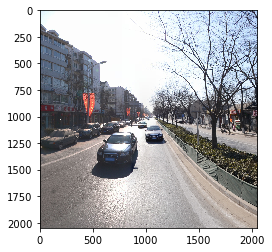

In [36]:
img = mpimg.imread('/scratch/lt2326-h21/a1/images/0000174.jpg')
print(img)
imgplot = plt.imshow(img)

# Part 2: models
https://www.pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/
https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d

In [105]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [106]:
#(CONV => RELU => POOL) * 2 => FC => RELU => FC => SOFTMAX

class LeNetModel(nn.Module):
    def __init__(self):
        super(LeNetModel, self).__init__()
        # The number of channels in the input images is 1 for grayscale or 3 for RGB
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = (5,5))
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=5) # TODO not sure what kernel_size is??
        
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size = (5,5))
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=3)
        
        # FC aka Fully Connected layer
        self.fc1 = nn.Linear(in_features=134*134*3, out_features=500) # TODO check the value for in/out_features
        self.relu3 = nn.ReLU()
        
        self.fc2 = nn.Linear(in_features=500, out_features=2) # TODO check the value for in/out_features
        self.sigmoid = nn.Sigmoid()
    # TODO The sigmoid function is used for the two-class logistic regression, whereas the softmax function is used for the multiclass logistic regression 
    
    def forward(self, data):
        # CONV => RELU => POOL
        data = self.conv1(data)
        #print(data.shape)
        data = self.relu1(data)
        data = self.maxpool1(data)
        #print(data.shape)
        
        # CONV => RELU => POOL
        data = self.conv2(data)
        #print(data.shape)
        data = self.relu2(data)
        data = self.maxpool2(data)
        #print(data.shape)

        # FC => RELU
        #print(torch.flatten(data, 1).shape)
        data = self.fc1(torch.flatten(data, 1))
        data = self.relu3(data)
        
        # FC => SOFTMAX
        data = self.fc2(data)
        #print(data)
        output = self.sigmoid(data)
        return output

In [107]:
# training hyperparameters
device = torch.device('cuda:2')

batch_size = 2
learning_rate = 0.001
epochs = 3

train_data_loader = DataLoader(train_data_list, shuffle=True, batch_size=batch_size)

In [124]:
# initialize models, optimizer and loss function
leNetModel = LeNetModel().to(device)
optimizer = optim.Adam(leNetModel.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

# train LeNet model
leNetModel.train()
for e in range(0, epochs):
    total_loss = 0
    for i, (input_data, labels) in enumerate(train_data_loader):
        # use list(input_data.shape)[0] instead of batch_size because size of last batch can be different
        input_data = input_data.reshape(list(input_data.shape)[0], 3, 2048, 2048).float()
        (input_data, labels) = (input_data.to(device), labels.to(device))
        output = leNetModel(input_data)

        # upsample the results
        # minibatch x channels x width
        m = nn.Upsample(size=2048*2048, mode="nearest")
        upsampled = m(output.reshape(list(input_data.shape)[0],2,1))
        
        loss = loss_fn(upsampled, labels)
        total_loss += loss.item()
        print(total_loss/(i+1), end='\r') # print average loss for the epoch
        
        loss.backward() # compute gradients
        optimizer.step() # update parameters
        optimizer.zero_grad() # reset gradients
    print()

# save model
torch.save(leNetModel, "lenet_model.pt")

0.33153951067376786
0.31352013742198814
0.31352026398117486


In [125]:
#    A convolution block (Conv -> BN -> ReLU -> MaxPool)
#    ResLayer - 1
#    ResLayer - 2
#    ResLayer - 3
#    ResLayer - 4
#    A classifier block with average Pooling and a Linear Layer

# a residual block for ResNets under 50 layers
class BasicBlock(nn.Module):
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1,
                     padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.shortcut = nn.Sequential()
        if stride != 1 or inplanes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(inplanes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        # downsampling layer
        out += self.shortcut(x)
        
        out = self.relu(out)
        return out
    
class ResNetModel(nn.Module):
    def __init__(self):
        super(ResNetModel, self).__init__()
        self.in_planes = 3 # initial inplanes is the number of channels
        
        self.conv = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = (5,5))
        self.bn = nn.BatchNorm2d(num_features=3) # C from an expected input of size (N,C,H,W)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=5)
        
        # TODO ResLayers double the channels in each layer, num_blocks is 2 to implement ResNet18 architecture
        self.layer1 = self._make_layer(planes=3, num_blocks=2, stride=1)
        self.layer2 = self._make_layer(planes=6, num_blocks=2, stride=2)
        self.layer3 = self._make_layer(planes=12, num_blocks=2, stride=2)
        self.layer4 = self._make_layer(planes=24, num_blocks=2, stride=2)
        
        # The resnet architecture has an adaptive average pooling layer at the end followed by a Linear layer
        # Softmax is included as part of the loss function. 
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(5, 5)) # TODO 
        self.fc = nn.Linear(in_features=600, out_features=25) # TODO change in_features (& out_features?)
        
    def forward(self, data):
        data = self.conv(data)
        data = self.bn(data)
        data = self.relu(data)
        data = self.maxpool(data)
        #print(data.shape)
        
        data = self.layer1(data)
        data = self.layer2(data)
        data = self.layer3(data)
        data = self.layer4(data)
        
        data = self.avgpool(data)
        #print(data.shape)  
        data = torch.flatten(data, 1)
        #print(data.shape)
        data = self.fc(data)
        return data
    
    # TODO why are they called planes and not channels?
    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1) # create a list of strides
        #print(strides)
        layers = []
        # Starting from 2nd resnet layers, only the first convolution layer of the first block has stride 2, the rest of all the convolution layers are of stride 1
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes # next input channels should be output channels
        return nn.Sequential(*layers)

In [127]:
resNetModel = ResNetModel().to(device)
#print(resNetModel)
optimizer2 = optim.Adam(resNetModel.parameters(), lr=learning_rate)
loss_fn2 = nn.CrossEntropyLoss()

# train ResNet model
resNetModel.train()
for e in range(0, epochs):
    total_loss = 0
    for i, (input_data, labels) in enumerate(train_data_loader):
        input_data = input_data.reshape(list(input_data.shape)[0], 3, 2048, 2048).float()
        (input_data, labels) = (input_data.to(device), labels.to(device))
        output = resNetModel(input_data)
        
        # sigmoid + upsampling
        sigmoid = nn.Sigmoid()
        output = sigmoid(output)
        m = nn.Upsample(size=2048*2048, mode="nearest")
        upsampled = m(output.reshape(list(input_data.shape)[0],25,1))
        
        loss = loss_fn2(upsampled, labels)
        total_loss += loss.item()
        print(total_loss/(i+1), end='\r') # print average loss for the epoch
        
        loss.backward() # compute gradients
        optimizer2.step() # update parameters
        optimizer2.zero_grad() # reset gradients
    print()
    
# save model
torch.save(resNetModel, "resnet_model.pt")

2.2936005648728965
2.2856402606577486
2.2856213756509734


# Part 3: testing and evaluation
 choose a probability threshold to decide whether a pixel is inside the bounding box or not, and then take recall/precision/X11/accuracy. Another one is to report it in terms of error, such as mean squared error.

In [ ]:
# load models
leNetModel = torch.load("lenet_model.pt").to(device)
resNetModel = torch.load("resnet_model.pt").to(device)

In [131]:
test_data_list = get_pixel_labels(testing_dict)
validation_data_list = get_pixel_labels(validation_dict)

test_data_loader = DataLoader(test_data_list, shuffle=True, batch_size=batch_size)
validation_data_loader = DataLoader(validation_data_list, shuffle=True, batch_size=batch_size)

In [ ]:
mse = nn.MSELoss()
test_loss = 0
correct_guesses = 0

leNetModel.eval()
for i, (input_data, labels) in enumerate(test_data_loader):
    input_data = input_data.reshape(batch_size, 3, 2048, 2048).float()
    (input_data, labels) = (input_data.to(device), labels.to(device))
    output = leNetModel(input_data)
    
    loss = mse(output, labels)
    test_loss += loss.item()
    #loss.backward() # do i need this?
    correct_guesses += torch.sum(torch.eq(torch.argmax(output, dim=1), target_labels.view(-1)).long())
    
accuracy = int(correct_guesses) / ((i+1) * batch_size)

print('>', np.round(test_loss/(i+1), 4))
print('accuracy: ', accuracy)

In [ ]:
resNetModel.eval()